# Training DCGAN with BCE Loss on MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 128
LR = 2e-4
NUM_EPOCHES = 50

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
trainset = datasets.MNIST('../data/MNIST/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## Model

In [7]:
from gans_package.models import DCGAN_Generator, DCGAN_Discriminator

In [8]:
latent_dim = 64
g_out_size = 1
g_hidden_size = 256

d_hidden_size = 16

g = DCGAN_Generator(latent_dim, g_out_size, g_hidden_size).to(device)
d = DCGAN_Discriminator(g_out_size, d_hidden_size).to(device)
print(g)
print(d)

from gans_package.utils import weights_init 

g = g.apply(weights_init)
d = d.apply(weights_init)

DCGAN_Generator(
  (generator): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(64, 1024, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): ConvTranspose2d(256, 1, kernel_size=(4, 4), stride=(2, 2))
    (4): Tanh()
  )
)
DCGAN_Discriminator(
  (discriminator): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Le

In [9]:
for img, label in trainloader:
    img = img.to(device)
    label = label.to(device)
    
    noise = torch.randn(img.size(0), latent_dim).to(device)
    
    print("Input Image Dimensions: {}".format(img.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("Label Dimensions: {}".format(label.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([128, 1, 28, 28])
Noise Dimensions: torch.Size([128, 64])
Label Dimensions: torch.Size([128])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([128, 1, 28, 28])
Prediction Output Dimensions: torch.Size([128, 1])


## Training

In [10]:
criterion = nn.BCEWithLogitsLoss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR, betas=(0.5, 0.999))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1: Generator Loss: 0.7324284949282339; Discriminator Loss: 0.6582164023476623


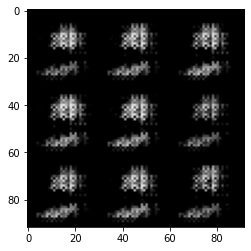

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 2: Generator Loss: 0.8662417035367189; Discriminator Loss: 0.6385271592435043


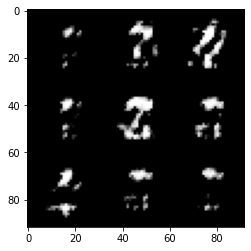

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 3: Generator Loss: 0.8093557753034238; Discriminator Loss: 0.6599169298529879


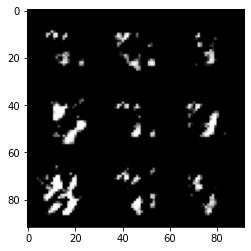

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 4: Generator Loss: 0.7666502420836167; Discriminator Loss: 0.681314724213533


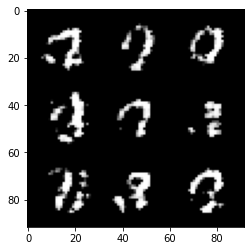

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5: Generator Loss: 0.7516450332934415; Discriminator Loss: 0.6774301873341299


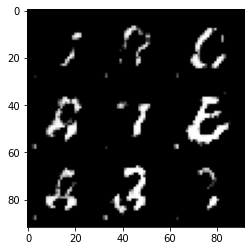

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 6: Generator Loss: 0.73125691645181; Discriminator Loss: 0.6822729889772086


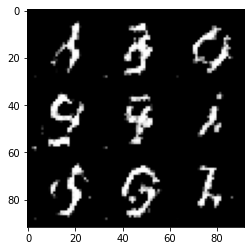

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 7: Generator Loss: 0.7187487866832758; Discriminator Loss: 0.6889559086451906


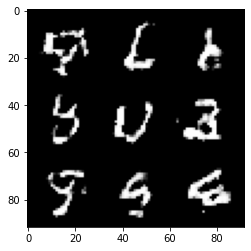

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 8: Generator Loss: 0.7095851314855791; Discriminator Loss: 0.6906359407947515


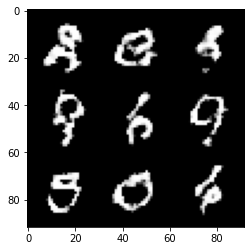

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 9: Generator Loss: 0.7088324375498269; Discriminator Loss: 0.6907808457864627


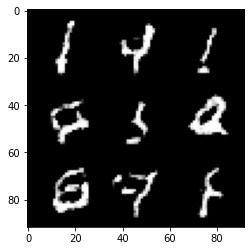

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10: Generator Loss: 0.7066568963563264; Discriminator Loss: 0.6923064754715861


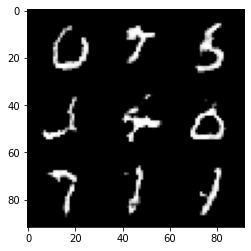

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 11: Generator Loss: 0.7038700702602166; Discriminator Loss: 0.6926695340986191


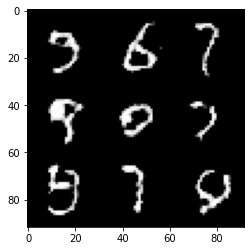

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 12: Generator Loss: 0.7018618418463766; Discriminator Loss: 0.6930857647710772


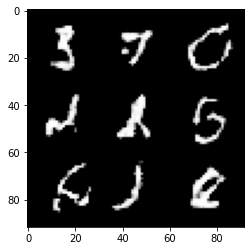

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 13: Generator Loss: 0.7022646196615467; Discriminator Loss: 0.6932056879183885


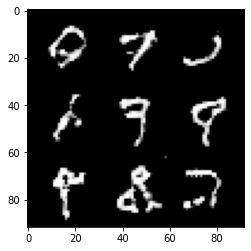

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 14: Generator Loss: 0.6992235464582057; Discriminator Loss: 0.6936952269661909


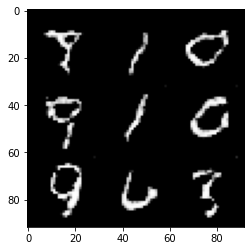

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15: Generator Loss: 0.6983845821067468; Discriminator Loss: 0.6940752488972027


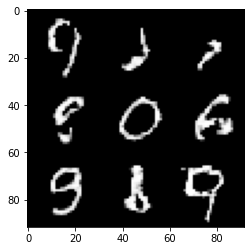

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 16: Generator Loss: 0.6973376096184574; Discriminator Loss: 0.6943769977291001


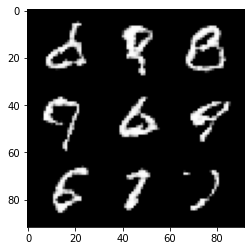

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 17: Generator Loss: 0.6970231257267853; Discriminator Loss: 0.6946004897292489


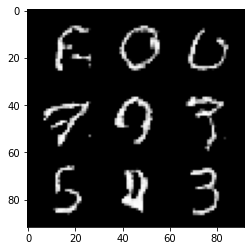

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 18: Generator Loss: 0.6948778019276763; Discriminator Loss: 0.6945652729158462


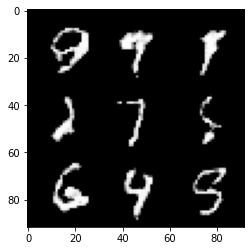

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 19: Generator Loss: 0.6963195687672222; Discriminator Loss: 0.6945724979138324


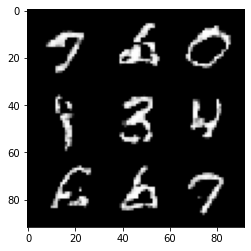

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20: Generator Loss: 0.6945868860175615; Discriminator Loss: 0.6944772725674644


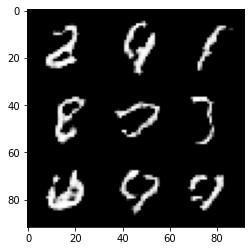

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 21: Generator Loss: 0.6945066581656938; Discriminator Loss: 0.6942943970023442


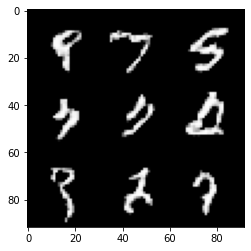

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 22: Generator Loss: 0.6956617213261407; Discriminator Loss: 0.6945244241625007


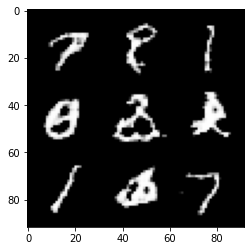

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 23: Generator Loss: 0.6939806409482; Discriminator Loss: 0.694087649840536


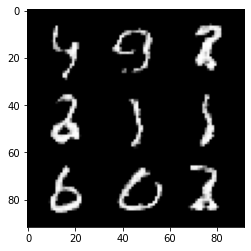

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 24: Generator Loss: 0.694424790741284; Discriminator Loss: 0.6943930876788809


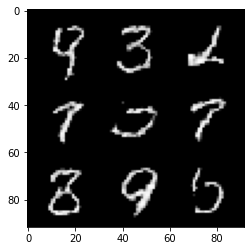

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25: Generator Loss: 0.6934429535479434; Discriminator Loss: 0.6940564025185509


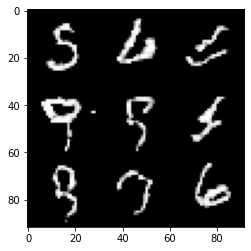

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 26: Generator Loss: 0.6938829245343645; Discriminator Loss: 0.6939482875724337


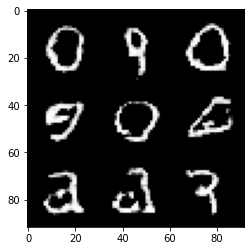

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 27: Generator Loss: 0.6938070135075909; Discriminator Loss: 0.6939517339663719


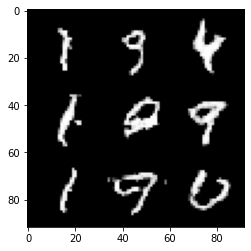

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 28: Generator Loss: 0.6936933682925666; Discriminator Loss: 0.6938387335998926


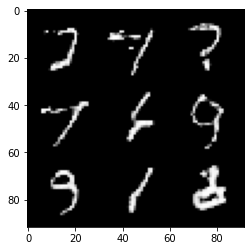

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 29: Generator Loss: 0.693840586046166; Discriminator Loss: 0.6938381359012905


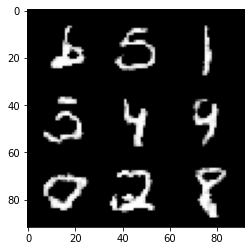

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30: Generator Loss: 0.6936149756028962; Discriminator Loss: 0.6937030778764915


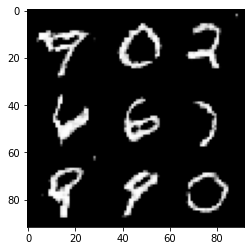

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 31: Generator Loss: 0.693672333953223; Discriminator Loss: 0.6936801792716166


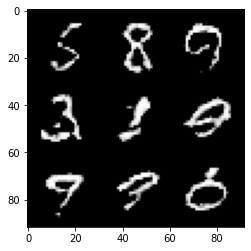

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 32: Generator Loss: 0.6934113845642187; Discriminator Loss: 0.6936142799188333


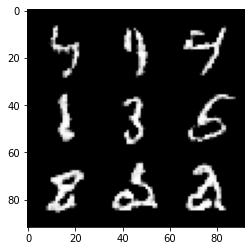

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 33: Generator Loss: 0.6935435271720642; Discriminator Loss: 0.6936267309351516


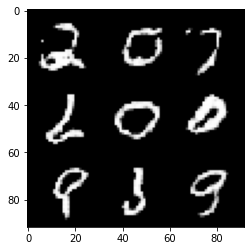

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 34: Generator Loss: 0.6936765285188964; Discriminator Loss: 0.6935684274254578


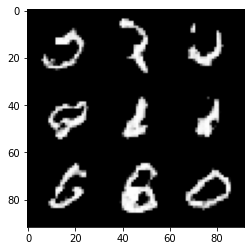

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35: Generator Loss: 0.6936330354289968; Discriminator Loss: 0.6935526041079686


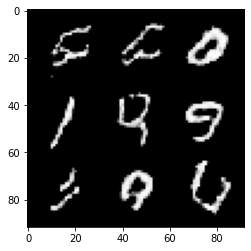

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 36: Generator Loss: 0.6935882907686457; Discriminator Loss: 0.6934964311148312


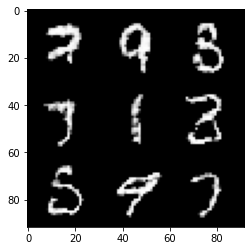

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 37: Generator Loss: 0.6935189316776007; Discriminator Loss: 0.693538743422738


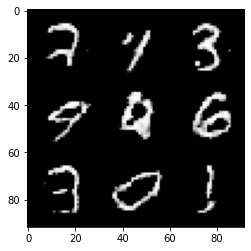

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 38: Generator Loss: 0.6931789376334087; Discriminator Loss: 0.6934610579822109


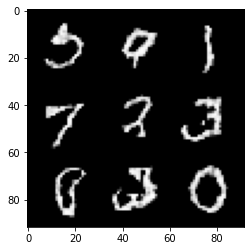

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 39: Generator Loss: 0.6935676336288452; Discriminator Loss: 0.6934477843201237


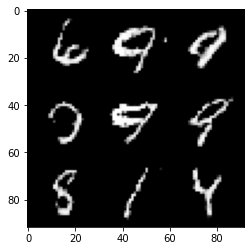

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40: Generator Loss: 0.6935356458875416; Discriminator Loss: 0.6934483792227722


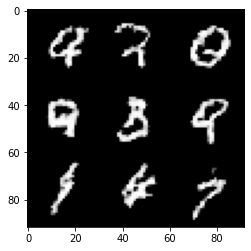

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 41: Generator Loss: 0.6933148789253316; Discriminator Loss: 0.6933952948686156


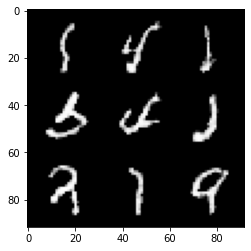

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 42: Generator Loss: 0.6934711279899581; Discriminator Loss: 0.6933893558821445


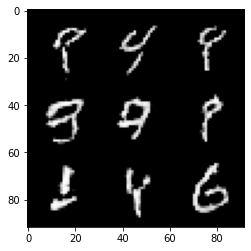

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 43: Generator Loss: 0.693462499296233; Discriminator Loss: 0.6933975510759902


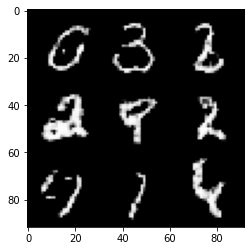

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 44: Generator Loss: 0.6931348950115602; Discriminator Loss: 0.6933486775548727


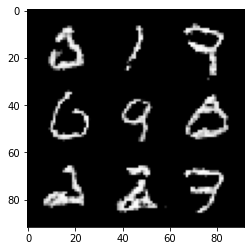

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45: Generator Loss: 0.693264959844699; Discriminator Loss: 0.6933367259975182


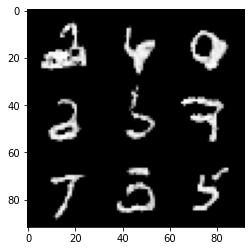

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 46: Generator Loss: 0.6935045559014847; Discriminator Loss: 0.6933634666237496


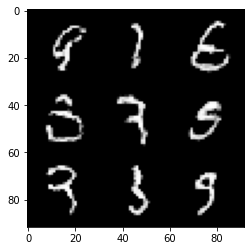

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 47: Generator Loss: 0.6933154105377604; Discriminator Loss: 0.6933358711982841


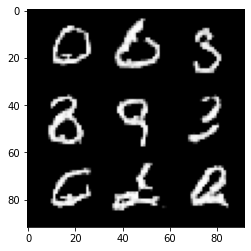

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 48: Generator Loss: 0.6935049751674188; Discriminator Loss: 0.69333803552046


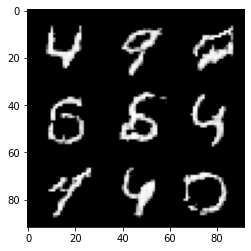

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 49: Generator Loss: 0.6934086763020009; Discriminator Loss: 0.6933124131485343


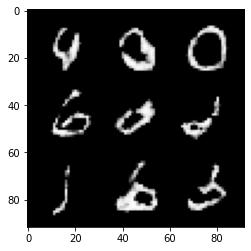

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50: Generator Loss: 0.6929855515707785; Discriminator Loss: 0.6933136312946327


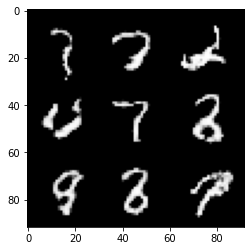

In [11]:
loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    for real, label in trainloader:
        b = real.size(0)
        real = real.to(device)
        
        d_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        fake_pred = d(fake.detach())
        real_pred = d(real)
        fake_loss = criterion(fake_pred, torch.zeros_like(fake_pred))
        real_loss = criterion(real_pred, torch.ones_like(real_pred))
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        epoch_d_loss += d_loss.item()
        d_optimizer.step()
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        pred = d(fake)
        g_loss = criterion(pred, torch.ones_like(pred))
        g_loss.backward()
        epoch_g_loss += g_loss.item()
        g_optimizer.step()
        
    epoch_g_loss /= len(trainloader)
    epoch_d_loss /= len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))
    
    if epoch%1==0:
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
    
        images = fake.detach().to("cpu")
        images_grid = make_grid(images[:9], nrow=3)
        plt.imshow(images_grid.permute(1, 2, 0).squeeze())
        plt.show()